In [140]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [141]:
def loadDataSet():
    dataMat = [];
    labelMat = [];
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
#     print(dataMatrix)
#     print(classLabels)
    labelMat = np.mat(classLabels).transpose()
#     print(labelMat)
    m, n = np.shape(dataMatrix)

    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
#     print(weights)

    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [142]:
dataArr, labelMat = loadDataSet()

wei = gradAscent(dataArr, labelMat)

In [145]:
def plotBestFit(wei):
    weights = wei
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c="red", marker="s")
    ax.scatter(xcord2, ycord2, s=30, c="green")
    
    x = np.arange(-3.0, 3.0, 0.1)
    y = (- weights[0] - weights[1] * x) / weights[2]
#     print(np.squeeze(np.asarray(y)))
    y = np.squeeze(np.asarray(y))
#     x = np.mat(x)
#     print(np.reshape(y,(-1)))
#     print(x)
#     print(y)
    ax.plot(x,y)
    plt.xlabel("X1")
    plt.ylabel("Y1")
    plt.show()
            

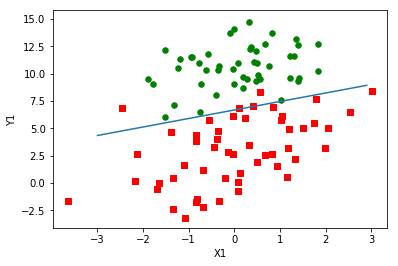

In [146]:
plotBestFit(wei)

In [149]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(np.sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

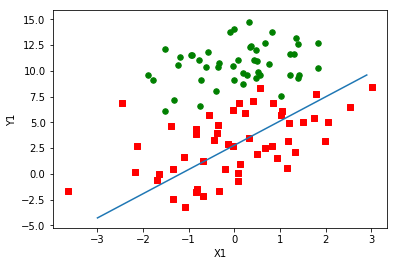

In [150]:
wei = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(wei)

In [165]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

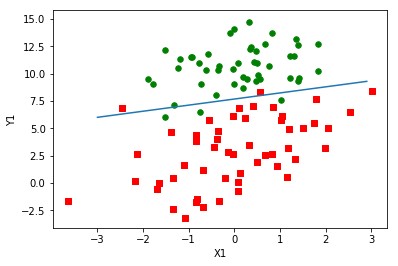

In [168]:
wei = stocGradAscent1(array(dataArr), labelMat, numIter=500)
plotBestFit(wei)

## 말의 배앓이 치사율 평가하기

In [200]:
def classifyVector(inX, weights):
#     print(inX * weights) 
    prob = sigmoid(np.sum(inX * weights))
    #     print(prob)
    return 1.0 if prob > 0.5 else 0.0

def colicTest(k):
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
        
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    
#     print(trainWeights)
    
    errorCount = 0
    numTestVec = 0.0
    
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
#         print(currLine)
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount) / numTestVec)
    print("[%d] The error rate of this test is: %f" % (k+1,errorRate))
    return errorRate

def multiTest():
    numTests = 10;
    errorSum = 0.0
    
    for k in range(numTests):
        errorSum += colicTest(k)
    
    print("After %d iterations the average error rate is : %f" % (numTests, errorSum / float(numTests)))


In [201]:
multiTest()

c:\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


[1] The error rate of this test is: 0.313433
[2] The error rate of this test is: 0.313433
[3] The error rate of this test is: 0.388060
[4] The error rate of this test is: 0.402985
[5] The error rate of this test is: 0.388060
[6] The error rate of this test is: 0.388060
[7] The error rate of this test is: 0.253731
[8] The error rate of this test is: 0.268657
[9] The error rate of this test is: 0.373134
[10] The error rate of this test is: 0.417910
After 10 iterations the average error rate is : 0.350746
